# Model

$ \frac{dI}{dt}=\frac{2prI(N-I)}{N^2}$

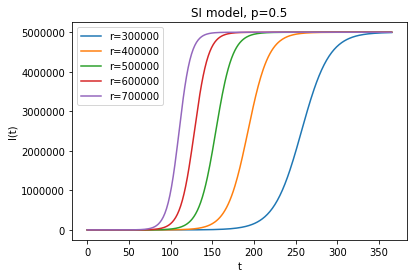

In [5]:
import matplotlib.pyplot as plt
population = 5e6
N=population

for r in range(300000, 800000, 100000):
    I=1
    Iarr=[I]
    Tarr=[0]

    #r=#interactions/day
    p=0.5
    tf=1
    dt=1/(24*60)

    for i in range(0, 365):
        t=0
        while t<tf:
            I=I+2*r*p/(N**2)*I*(N-I)*dt
            t+=dt
        Iarr.append(I)
        Tarr.append(t)
    plt.plot(Iarr, label = "r="+str(r))
plt.xlabel('t')
plt.ylabel('I(t)')
plt.title('SI model, p=0.5')
plt.legend()
plt.show()

In [81]:
def derivative(Y, dt):
    der=[]
    for i in range(1,len(Y)-1):
        der.append((Y[i+1]-Y[i-1])/(2*dt))
    return der
class Stack:
    def __init__(self, size):
        self.stackArr = [0]*size
    def add(self, value):
        self.stackArr.pop(0)
        self.stackArr.append(value)
    def get(self):
        return self.stackArr[0]  

# Model
$\frac{dS}{dt}=-rIS$, S is susceptible
<br>
$\frac{dI}{dt}=rIS-\alpha I - \beta I$, I is infective
<br>
$\frac{dR}{dt}=\alpha I$, R is recovered
<br>
$\frac{dD}{dt}=\beta I$, D is dead

In [7]:
from matplotlib import pyplot as plt
import numpy as np

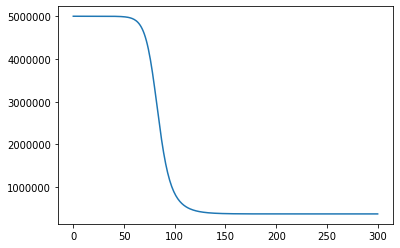

In [227]:
r=1400000
r0=r
population = 5e6
N=population


alpha=0.1
I=1
S=population-I
Q=0
R=0
Iarr=[I]
Sarr=[S]
Qarr=[Q]
Rarr=[R]
rarr=[r]
    #r=1000*24*60#interactions/day
p=0.5
tf=1
dt=1/(24*60)


for i in range(0,300):
    t=0
    while t<tf:
        S=S+(-2*r*p*I*S/N**2)*dt
        I=I+(2*r*p*I*S/N**2-alpha*I)*dt
        R=R+(alpha*I)*dt
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
plt.plot(Sarr)


In [226]:
Sarr[-1]

375148.3665005811

In [218]:
Sarr

[4999999.0,
 4999998.999805556,
 4999999.188654246,
 4999815.774639823,
 5177944.971133209,
 -173988657.33114788,
 -5847296591980.134,
 2.355357538057461e+20,
 -8.69042269703805e+37,
 -1.0836558900388855e+83,
 5.69454227935449e+200,
 -inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

# Model: SIR delayed recovery

$\frac{dS(t)}{dt}= -\frac{2pISr}{N^2}$
<br>
$\frac{dI(t)}{dt} = \frac{2pISr}{N^2} + \frac{dS(t-\tau)}{dt}$
<br>
$\frac{dR(t)}{dt} =  -\frac{dS(t-\tau)}{dt}$

Text(0.5, 1.0, 'SIR model, p=0.5, r=50, delay=10')

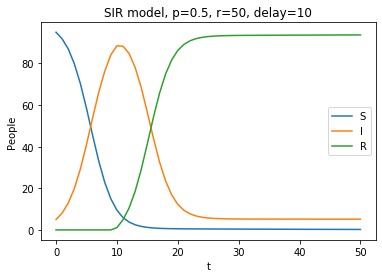

In [400]:
import numpy as np
import matplotlib.pyplot as plt
rate = np.linspace(500000, 900000, 4)
delays=[]
Sss=[]
a=[7,14,21,28]
#for ii,r in enumerate(rate):
#for fig,delay in enumerate(a):


N=100
r=50

I=5
S=N-I
R=0
Iarr=[I]
Sarr=[S]
Rarr=[R]

    #r=1000*24*60#interactions/day
p=0.5
tf=1
dt=1/(24)
#delay = 20#delay between desease and recovery in days
delay=10
lagged_S = Stack(int(delay/dt))
lagged_I = Stack(int(delay/dt))

for i in range(0, 50):
    t=0
    while t<tf:
        I=I+(2*r*p*(I*S-lagged_S.get()*lagged_I.get())/(N**2))*dt
        S=S+(-2*r*p*I*S/(N**2))*dt
        R=R+(2*r*p*(lagged_S.get()*lagged_I.get())/(N**2))*dt
        lagged_S.add(S)
        lagged_I.add(I)
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
    Rarr.append(R)
Sss.append(Sarr[-1])
delays.append(delay)
#plt.plot(Sarr, label = "r="+str(r))
#Imax[jj][ii]=np.argmax(Iarr)
    #delayArr.append(delay)
#plt.figure(fig)
plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Rarr, label = "R")
plt.plot([0])
plt.xlabel('t')
plt.ylabel('People')
plt.legend()
plt.title('SIR model, p=0.5, r='+str(r)+', delay='+str(delay))

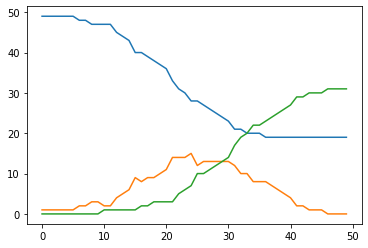

In [395]:
Sarr= [49, 49, 49, 49, 49, 49, 48, 48, 47, 47, 47, 47, 45, 44, 43, 40, 40, 39, 38, 37, 36, 33, 31, 30, 28, 28, 27, 26, 25, 24, 23, 21, 21, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
Iarr= [1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 4, 5, 6, 9, 8, 9, 9, 10, 11, 14, 14, 14, 15, 12, 13, 13, 13, 13, 13, 12, 10, 10, 8, 8, 8, 7, 6, 5, 4, 2, 2, 1, 1, 1, 0, 0, 0, 0]
Rarr= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 5, 6, 7, 10, 10, 11, 12, 13, 14, 17, 19, 20, 22, 22, 23, 24, 25, 26, 27, 29, 29, 30, 30, 30, 31, 31, 31, 31]

plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Rarr, label = "R")

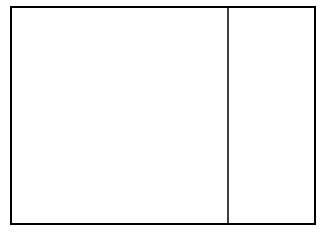

In [356]:
fig, ax= plt.subplots()

for s in ['top','bottom','left','right']:
    ax.spines[s].set_linewidth(2)
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 1.4)
ax.set_ylim(0, 1)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.plot([1,1],[0,1], color='black')
plt.show()

In [372]:
for nra in range(1,7):
    nr = nra-1
    cols = 3
    col = nr%3
    row = int((nr-col)/cols)
    print("nr", nra,row,col)

nr 1 0 0
nr 2 0 1
nr 3 0 2
nr 4 1 0
nr 5 1 1
nr 6 1 2


In [377]:
cols = 3
rows = 10

nra=1
nr = nra-1
cols = 3
col = nr%3
row = int((nr-col)/cols)

x=1+0.4/(cols + 1)*(col+1)
y=0+1/(rows+1)*(row+1)
print(x,y)

1.1 0.09090909090909091


'\n# Having been created by twinx, par2 has its frame off, so the line of its\n# detached spine is invisible.  First, activate the frame but make the patch\n# and spines invisible.\nmake_patch_spines_invisible(par2)\n# Second, show the right spine.\npar2.spines["right"].set_visible(True)\n\np1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")\np2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")\np3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")\n\nhost.set_xlim(0, 2)\nhost.set_ylim(0, 2)\npar1.set_ylim(0, 4)\npar2.set_ylim(1, 65)\n\nhost.set_xlabel("Distance")\nhost.set_ylabel("Density")\npar1.set_ylabel("Temperature")\npar2.set_ylabel("Velocity")\n\nhost.yaxis.label.set_color(p1.get_color())\npar1.yaxis.label.set_color(p2.get_color())\npar2.yaxis.label.set_color(p3.get_color())\n\ntkw = dict(size=4, width=1.5)\nhost.tick_params(axis=\'y\', colors=p1.get_color(), **tkw)\npar1.tick_params(axis=\'y\', colors=p2.get_color(), **tkw)\npar2.tick_params(axi

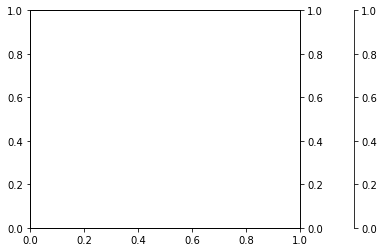

In [334]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
'''
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()
'''

In [324]:
ax.spines['augborder']=ax.spines['right']

In [ ]:
ax.

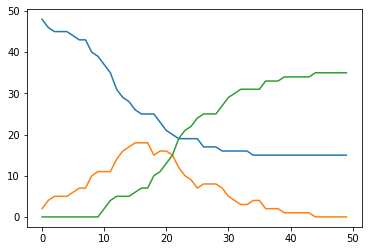

In [309]:
Sarr= [48, 46, 45, 45, 45, 44, 43, 43, 40, 39, 37, 35, 31, 29, 28, 26, 25, 25, 25, 23, 21, 20, 19, 19, 19, 19, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Iarr= [2, 4, 5, 5, 5, 6, 7, 7, 10, 11, 11, 11, 14, 16, 17, 18, 18, 18, 15, 16, 16, 15, 12, 10, 9, 7, 8, 8, 8, 7, 5, 4, 3, 3, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Rarr= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 5, 5, 5, 6, 7, 7, 10, 11, 13, 15, 19, 21, 22, 24, 25, 25, 25, 27, 29, 30, 31, 31, 31, 31, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35]

plt.plot(Sarr)
plt.plot(Iarr)
plt.plot(Rarr)

# Model
$\frac{dS(t)}{dt}= -\frac{2pISr}{(S+I+R)^2}$
<br>
$\frac{dI(t)}{dt}= \frac{2pISr}{(S+I+R)^2} + \frac{dS(t-\tau_i)}{dt}$
<br>
$\frac{dQ(t)}{dt}=  -\frac{dS(t-\tau_i)}{dt}+\frac{dS(t-(\tau_i+\tau_r))}{dt}$
<br>
$\frac{dR(t)}{dt}=  -\frac{dS(t-(\tau_i+\tau_r))}{dt}$

Text(0.5, 1.0, 'SIQR model, p=0.5, r0=9')

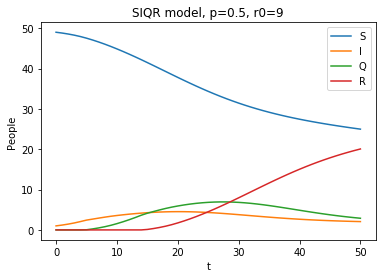

In [391]:
import numpy as np
import matplotlib.pyplot as plt

class Stack:
    def __init__(self, size):
        self.stackArr = np.zeros(size)
    def add(self, value):
        self.stackArr=np.delete(self.stackArr, 0)
        self.stackArr=np.append(self.stackArr,value)
    def get(self):
        return self.stackArr[0]  

#for ii,r in enumerate(rate):
r=9#1400000/5e6
r0=r
population =50# 5e6
N=50

I=1#1
S=N-I
Q=0
R=0
Iarr=[I]
Sarr=[S]
Qarr=[Q]
Rarr=[R]
rarr=[r]
    #r=1000*24*60#interactions/day
p=0.5
tf=1
dt=1/(24)
recovery = 10#delay between desease and recovery in days
incubation = 5
T_si_i = Stack(int(incubation/dt))
T_si_t = Stack(int((incubation+recovery)/dt))


for i in range(0,50):
    t=0
    while t<tf:
        r=r0/N*(N-Q)
        T_si=2*r*p*I*S/((N-Q)**2)
        T_iq=T_si_i.get()
        T_qr=T_si_t.get()
        S=S+(-T_si)*dt
        I=I+(T_si-T_iq)*dt
        Q=Q+(T_iq-T_qr)*dt
        R=R+(T_qr)*dt
        
        T_si_i.add(T_si)
        T_si_t.add(T_si)
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
    Qarr.append(Q)
    Rarr.append(R)
    rarr.append(r)
    #if i%10==0:
     #   print(i)
plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Qarr, label = "Q")
plt.plot(Rarr, label = "R")
plt.plot([0])
plt.xlabel('t')
plt.ylabel('People')
plt.legend()
plt.title('SIQR model, p=0.5, r0='+str(r0))

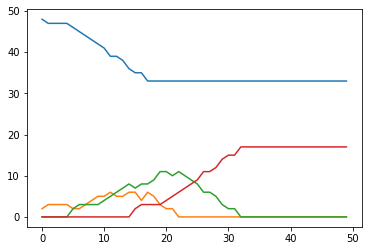

In [387]:
Sarr= [48, 47, 47, 47, 47, 46, 45, 44, 43, 42, 41, 39, 39, 38, 36, 35, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33]
Iarr= [2, 3, 3, 3, 3, 2, 2, 3, 4, 5, 5, 6, 5, 5, 6, 6, 4, 6, 5, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Qarr= [0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 7, 8, 8, 9, 11, 11, 10, 11, 10, 9, 8, 6, 6, 5, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Rarr= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 11, 11, 12, 14, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Qarr, label = "Q")
plt.plot(Rarr, label = "R")


In [262]:
a=np.random.binomial(1,0.5)
a

0

In [252]:
1==True

True

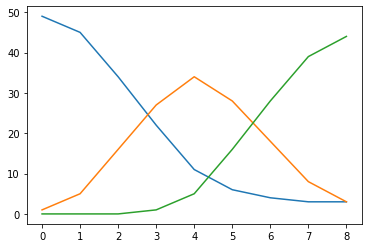

In [263]:
Sarr= [49, 45, 34, 22, 11, 6, 4, 3, 3]
Iarr= [1, 5, 16, 27, 34, 28, 18, 8, 3]
Rarr= [0, 0, 0, 1, 5, 16, 28, 39, 44]

plt.plot(Sarr)
plt.plot(Iarr)
plt.plot(Rarr)

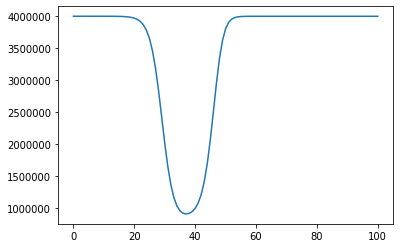

In [188]:
plt.plot(rarr)

In [ ]:
###backup
import numpy as np
import matplotlib.pyplot as plt

class Stack:
    def __init__(self, size):
        self.stackArr = np.zeros(size)
    def add(self, value):
        self.stackArr=np.delete(self.stackArr, 0)
        self.stackArr=np.append(self.stackArr,value)
    def get(self):
        return self.stackArr[0]  

#for ii,r in enumerate(rate):
r=4000000
r0=r
population = 5e6
N=population

I=1
S=population-I
Q=0
R=0
Iarr=[I]
Sarr=[S]
Qarr=[Q]
Rarr=[R]
rarr=[r]
    #r=1000*24*60#interactions/day
p=0.5
tf=1
dt=1/(24*60)
recovery = 14#delay between desease and recovery in days
incubation = 2
S_i = Stack(int(incubation/dt))
I_i = Stack(int(incubation/dt))
Q_i = Stack(int(incubation/dt))
S_t = Stack(int((incubation+recovery)/dt))
I_t = Stack(int((incubation+recovery)/dt))
Q_t = Stack(int((incubation+recovery)/dt))


for i in range(0,100):
    t=0
    while t<tf:
        #r=r0/N*(N-Q)
        T_si=
        T_iq=
        T_qr=
        Snew=S+(-2*r*p*I*S/((N-Q)**2))*dt
        Inew=I+dt*2*r*p*(I*S/(N-Q)**2-I_i.get()*S_i.get()/(N-Q_i.get())**2)
        Qnew=Q+dt*2*r*p*(I_i.get()*S_i.get()/(N-Q_i.get())**2-I_t.get()*S_t.get()/(N-Q_t.get())**2)
        Rnew=R+(2*r*p*(I_t.get()*S_t.get())/((N-Q_t.get())**2))*dt
        S=Snew
        I=Inew
        R=Rnew
        Q=Qnew

        S_i.add(S)
        I_i.add(I)
        Q_i.add(Q)
        S_t.add(S)
        I_t.add(I)
        Q_t.add(Q)
        t+=dt
    Iarr.append(I)
    Sarr.append(S)
    Qarr.append(Q)
    Rarr.append(R)
    rarr.append(r)
    print(i)
plt.plot(Sarr, label = "S")
plt.plot(Iarr, label = "I")
plt.plot(Qarr, label = "Q")
plt.plot(Rarr, label = "R")
plt.plot([0])
plt.xlabel('t')
plt.ylabel('People')
plt.legend()
plt.title('SIQR model, p=0.5, r=600000')

In [259]:
nrparticles = 51
radii = 0.01
initvel = 1
#stylesS = {'edgecolor': 'C0', 'linewidth': 2, 'fill': None}
types = [{"type":"S", "num":49}, {"type":"I", "num":1}]

sum([x["num"] for x in types])

50

In [ ]:
11